In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.covariance import MinCovDet
from sklearn import tree
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('bank_new.csv')
df.head()


,id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,370.055237,1,0,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,233.998933,10,0,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,NaN,1,2,0
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,252.525808,1,0,0
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,NaN,1,2,0


In [2]:
str_col = ['job','marital','education','default','housing','loan','contact','month']

dummied_df = pd.get_dummies(df[str_col], drop_first=True)
dummied_df.head(3)

num_df = df.drop(columns=str_col)
df2 = pd.concat([num_df,dummied_df,df[str_col]], axis=1)
df2.head()

train_val, test = train_test_split(df2,test_size=0.1,random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,marital,education,default,housing,loan,contact,month
13378,13379,46,0,10,378.293875,1,0,1,False,False,...,False,False,unemployed,married,tertiary,no,yes,no,cellular,jul
3800,3801,41,-333,30,300.845752,3,2,0,True,False,...,False,False,blue-collar,divorced,secondary,no,yes,no,cellular,jan
10398,10399,30,5389,6,159.053623,3,0,1,False,False,...,False,False,management,single,tertiary,no,no,no,cellular,aug
23401,23402,39,255,5,334.802583,1,0,0,False,False,...,False,False,management,single,tertiary,no,yes,no,sending _document,may
26223,26224,47,33,5,NaN,1,0,1,False,False,...,False,False,services,single,secondary,no,yes,no,cellular,may


In [3]:
train_val.isnull().sum()

id                              0
age                             0
amount                          0
day                             0
duration                     6331
campaign                        0
previous                        0
y                               0
job_blue-collar                 0
job_entrepreneur                0
job_housemaid                   0
job_management                  0
job_retired                     0
job_self-employed               0
job_services                    0
job_student                     0
job_technician                  0
job_unemployed                  0
job_unknown                     0
marital_married                 0
marital_single                  0
education_secondary             0
education_tertiary              0
education_unknown               0
default_yes                     0
housing_yes                     0
loan_yes                        0
contact_sending _document       0
contact_telephone               0
month_aug     

In [4]:
train_val.corr(numeric_only=True)['duration'].map(abs).sort_values(ascending=False)

duration                     1.000000
housing_yes                  0.556899
loan_yes                     0.372579
y                            0.277575
age                          0.207738
month_aug                    0.187310
month_may                    0.184593
marital_single               0.164614
previous                     0.143538
marital_married              0.115429
job_student                  0.107913
contact_sending _document    0.087863
education_tertiary           0.081769
job_blue-collar              0.080727
month_jun                    0.065998
month_oct                    0.052855
job_unknown                  0.046328
job_management               0.045735
job_unemployed               0.044179
month_mar                    0.043775
job_housemaid                0.039184
education_secondary          0.033989
job_retired                  0.033277
month_sep                    0.032082
amount                       0.030532
day                          0.023779
job_services

In [5]:
mcd = MinCovDet(random_state=0, support_fraction=0.7)
dis_df = train_val.drop('id', axis=1).drop(str_col, axis=1).dropna()
mcd.fit(dis_df)
dis_df['distance'] = mcd.mahalanobis(dis_df)

<Axes: >

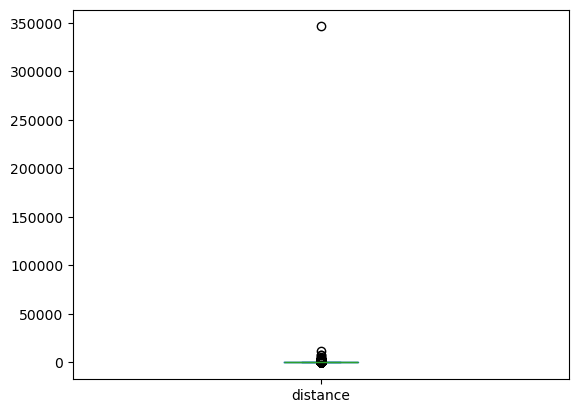

In [6]:
dis_df['distance'].plot(kind='box')

In [7]:
train_val2 = train_val.dropna()
print(train_val2.shape)
print(dis_df.shape)
print(train_val2.head())
print(dis_df.head())

(18084, 48)
(18084, 40)
          id  age  amount  day    duration  campaign  previous  y  \
13378  13379   46       0   10  378.293875         1         0  1   
3800    3801   41    -333   30  300.845752         3         2  0   
10398  10399   30    5389    6  159.053623         3         0  1   
23401  23402   39     255    5  334.802583         1         0  0   
25158  25159   52     556   13  231.375776         6         0  1   

       job_blue-collar  job_entrepreneur  ...  month_oct  month_sep  \
13378            False             False  ...      False      False   
3800              True             False  ...      False      False   
10398            False             False  ...      False      False   
23401            False             False  ...      False      False   
25158            False             False  ...      False      False   

               job   marital  education  default  housing  loan  \
13378   unemployed   married   tertiary       no      yes    no   


In [8]:
no = dis_df[dis_df['distance']>300000].index
print(no)
no = train_val2.iloc[no[0]:no[0]+1,:].index
print(no)
train_val2 = train_val2.drop(no)


Index([3140], dtype='int64')
Index([18938], dtype='int64')


In [9]:
train_val2.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,marital,education,default,housing,loan,contact,month
13378,13379,46,0,10,378.293875,1,0,1,False,False,...,False,False,unemployed,married,tertiary,no,yes,no,cellular,jul
3800,3801,41,-333,30,300.845752,3,2,0,True,False,...,False,False,blue-collar,divorced,secondary,no,yes,no,cellular,jan
10398,10399,30,5389,6,159.053623,3,0,1,False,False,...,False,False,management,single,tertiary,no,no,no,cellular,aug
23401,23402,39,255,5,334.802583,1,0,0,False,False,...,False,False,management,single,tertiary,no,yes,no,sending _document,may
25158,25159,52,556,13,231.375776,6,0,1,False,False,...,False,False,management,single,tertiary,no,no,no,cellular,aug


In [12]:
ls_df = train_val2.drop(columns = str_col)
x = ls_df.drop(columns=['id','y','duration'])
t = ls_df['duration']

x_train, x_test, y_train, y_test = train_test_split(x,t,random_state=0, test_size=0.2)

from sklearn.linear_model import Lasso

for i in range(1,42):
    max=0
    val_max=0
    val = i/20
    las = Lasso(alpha=val)
    las.fit(x_train,y_train)
    tmp = las.score(x_test, y_test)
    if tmp > max:
        max=tmp
        val_max = val
print(val_max,max)

2.05 0.7224634844581863


In [13]:
las.fit(x_train,y_train)
print(las.score(x_train,y_train))
print(las.score(x_test,y_test))

0.730101797521856
0.7224634844581863


In [14]:
ls_df2 = train_val.drop(columns=['id','y']).drop(columns=str_col)
ls_df2

,age,amount,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
13378,46,0,10,378.293875,1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3800,41,-333,30,300.845752,3,2,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
10398,30,5389,6,159.053623,3,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
23401,39,255,5,334.802583,1,0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
26223,47,33,5,NaN,1,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22584,33,-208,4,424.191814,3,1,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
501,55,4746,23,404.106909,3,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
23166,38,304,11,NaN,1,5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
20828,35,628,29,266.249751,2,0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [15]:
train_val

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,marital,education,default,housing,loan,contact,month
13378,13379,46,0,10,378.293875,1,0,1,False,False,...,False,False,unemployed,married,tertiary,no,yes,no,cellular,jul
3800,3801,41,-333,30,300.845752,3,2,0,True,False,...,False,False,blue-collar,divorced,secondary,no,yes,no,cellular,jan
10398,10399,30,5389,6,159.053623,3,0,1,False,False,...,False,False,management,single,tertiary,no,no,no,cellular,aug
23401,23402,39,255,5,334.802583,1,0,0,False,False,...,False,False,management,single,tertiary,no,yes,no,sending _document,may
26223,26224,47,33,5,NaN,1,0,1,False,False,...,False,False,services,single,secondary,no,yes,no,cellular,may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22584,22585,33,-208,4,424.191814,3,1,0,True,False,...,False,False,blue-collar,married,secondary,no,yes,yes,cellular,may
501,502,55,4746,23,404.106909,3,0,1,False,False,...,False,False,technician,married,unknown,no,yes,no,sending _document,may
23166,23167,38,304,11,NaN,1,5,0,False,False,...,False,False,retired,married,unknown,no,no,no,cellular,may
20828,20829,35,628,29,266.249751,2,0,0,True,False,...,False,False,blue-collar,married,secondary,no,yes,no,sending _document,may


In [16]:
isnull = ls_df2['duration'].isnull()
ls_df2 = ls_df2.loc[isnull]
ls_df2 = ls_df2.drop(columns='duration')

isnull = train_val['duration'].isnull()
pred = las.predict(ls_df2)


train_val.loc[isnull,'duration'] = pred